# TP n°3: modéles linéaires

## Introduction
Dans ce TP, nous allons explorer différentes aspects de régression et de classification en utilisant les modèles linéaires.
On va voir:
- comment générer des données synthétiques,
- comment entraîner des modèles de régression linéaire simple et multiple,
- comment appliquer la régularisation pour éviter le surapprentissage,
- comment entraîner des modèles de régression logistique pour la classification,
- comment visualiser les résultats et évaluer les performances des modèles.


# A compléter ici :
# Nom : Andrieu
# Prénom : Ludovic
# N étudiant : 22103219

In [32]:
# %pip install numpy matplotlib pandas scikit-learn seaborn

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercice 1: Régression Linéaire Simple

Dans cet exercice, nous allons générer un jeu de données synthétiques simple et appliquer un modèle de régression linéaire pour prédire la variable cible. Nous allons également visualiser les résultats et évaluer les performances du modèle.

### Étapes:
1. Générer un jeu de données synthétiques avec une seule caractéristique: pour cela on peut utiliser la fonction `make_regression` de la bibliothèque `sklearn.datasets`.
2. Diviser les données en ensembles d'entraînement et de test.
3. Entrainez un modèle de régression linéaire sur les données d'entraînement.
4. Faire des prédictions sur les données de test.
5. Visualiser les résultats en traçant les points de données réels et les prédictions du modèle.
6. Évaluer les performances du modèle en utilisant des métriques telles que le coefficient de détermination (R²) et l'erreur quadratique moyenne (MSE).

(100, 1) (100,)
R2 Score: 0.984
Mean Squared Error: 24.3


<AxesSubplot: >

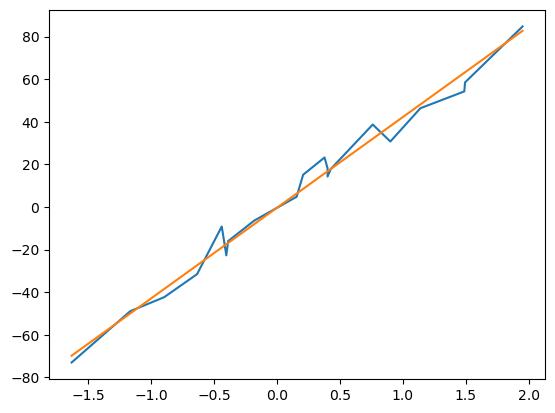

In [34]:

###########################
# Exercise 1: Régression Linéaire Simple
###########################

# Créez un jeu de données
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y, *_ = make_regression(n_samples=100, n_features=1, random_state=0, noise=5.0)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Evaluez le modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3g}')

# Faites le plot
#sns.lineplot(x=X_train[:, 0], y=y_train)
sns.lineplot(x=X_test[:, 0], y=y_test)
sns.lineplot(x=X_test[:, 0], y=y_test_pred)


## Exercice 2: Régression Linéaire Multiple

Dans cet exercice, nous allons utiliser un jeu de données réel pour appliquer un modèle de régression linéaire multiple. Nous allons charger le jeu de données, diviser les données en ensembles d'entraînement et de test, entraîner le modèle, faire des prédictions et évaluer les performances du modèle.

### Étapes:
1. Charger le jeu de données: nous utiliserons le jeu de données sur le diabète disponible dans la bibliothèque `sklearn.datasets`.
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression linéaire multiple sur les données d'entraînement.
4. Faire des prédictions sur les données de test.
5. Évaluer les performances du modèle en utilisant des métriques telles que le coefficient de détermination (R²) et l'erreur quadratique moyenne (MSE).
6. Comparer les performances du modèle de régression linéaire multiple avec celles du modèle de régression linéaire simple: pour cela 

In [35]:

###########################
# Exercise 2
###########################

from sklearn.datasets import load_diabetes
from sklearn.utils import Bunch

# Load the Diabetes dataset
data: Bunch = load_diabetes()
# print(data.keys())
X = data["data"]
y = data["target"]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3g}')

for index, featureName in enumerate(data["feature_names"]):
    print()
    print(f"{featureName} ({index})")
    X = data["data"][:, index, None]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3g}')


(442, 10) (442,)
R2 Score: 0.332
Mean Squared Error: 3.42e+03

age (0)
R2 Score: 0.034
Mean Squared Error: 4.95e+03

sex (1)
R2 Score: 0.00155
Mean Squared Error: 5.12e+03

bmi (2)
R2 Score: 0.191
Mean Squared Error: 4.15e+03

bp (3)
R2 Score: 0.187
Mean Squared Error: 4.17e+03

s1 (4)
R2 Score: 0.0476
Mean Squared Error: 4.88e+03

s2 (5)
R2 Score: 0.05
Mean Squared Error: 4.87e+03

s3 (6)
R2 Score: 0.00639
Mean Squared Error: 5.1e+03

s4 (7)
R2 Score: 0.109
Mean Squared Error: 4.57e+03

s5 (8)
R2 Score: 0.198
Mean Squared Error: 4.11e+03

s6 (9)
R2 Score: 0.148
Mean Squared Error: 4.37e+03


## Exercice 3: Régularisation (Ridge et Lasso)

Dans cet exercice, nous allons explorer les techniques de régularisation Ridge et Lasso pour améliorer les performances des modèles de régression linéaire et éviter le surapprentissage (overfitting).

### Régularisation

La régularisation est une technique utilisée pour ajouter une pénalité à la fonction de coût d'un modèle de régression afin de réduire la complexité du modèle et d'éviter le surapprentissage. Les deux méthodes de régularisation les plus courantes sont Ridge et Lasso.

#### Régularisation Ridge (ou Tikhonov)

La régularisation Ridge ajoute une pénalité égale à la somme des carrés des coefficients (L2) à la fonction de coût. La fonction de coût pour la régression Ridge est définie comme suit :

$$ J(\theta) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{n} \theta_j^2 $$

où :
- $y_i$ est la valeur réelle,
- $\hat{y}_i$ est la valeur prédite,
- $\theta_j$ sont les coefficients du modèle,
- $\alpha$ est le paramètre de régularisation qui contrôle la force de la pénalité.

La régularisation Ridge tend à réduire les coefficients des caractéristiques moins importantes, mais ne les met pas à zéro.

#### Régularisation Lasso (Least Absolute Shrinkage and Selection Operator)

La régularisation Lasso ajoute une pénalité égale à la somme des valeurs absolues des coefficients (L1) à la fonction de coût. La fonction de coût pour la régression Lasso est définie comme suit :

$$ J(\theta) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{n} |\theta_j| $$

La régularisation Lasso tend à réduire certains coefficients à zéro, ce qui permet une sélection automatique des caractéristiques et peut produire des modèles plus interprétables.

### Exercice

1. Entraîner un modèle de régression Ridge sur les données d'entraînement.
2. Entraîner un modèle de régression Lasso sur les données d'entraînement.
3. Faire des prédictions sur les données de test avec les deux modèles.
4. Comparer les performances des modèles (avec le modèle non-régularisé) en utilisant des métriques telles que le coefficient de détermination (R²) et l'erreur quadratique moyenne (MSE).
5. Étudier l'effet du coefficient alpha.
6. Comparer les coefficients des deux modèles pour observer l'effet de la régularisation.


In [36]:

###########################
# Exercise 3: Régularisation (Ridge et Lasso)
###########################

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso

data: Bunch = fetch_california_housing()
# print(data.keys())
X = data["data"]
y = data["target"]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ridge Regression
model = Ridge()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g} MSE: {mean_squared_error(y_test, y_test_pred):.3g}')
print(model.coef_)

# Lasso Regression
print()
model = Lasso()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g} MSE: {mean_squared_error(y_test, y_test_pred):.3g}')
print(model.coef_)

# model non regularisé
print()
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g} MSE: {mean_squared_error(y_test, y_test_pred):.3g}')
print(model.coef_)


(20640, 8) (20640,)
R2 Score: 0.594 MSE: 0.529
[ 4.33221652e-01  9.29535328e-03 -9.84280119e-02  5.92087655e-01
 -7.55362328e-06 -4.74599017e-03 -4.21424459e-01 -4.34125075e-01]

R2 Score: 0.281 MSE: 0.938
[ 1.49780917e-01  5.87305430e-03  0.00000000e+00 -0.00000000e+00
 -8.39603693e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]

R2 Score: 0.594 MSE: 0.529
[ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]


In [37]:
def validationCurveDisplay2(train_scores, test_scores, x, xscale):
    axe = plt.axes()
    axe.set_xscale(xscale)

    train_scores_mean = train_scores.mean(axis=-1)
    test_scores_mean = test_scores.mean(axis=-1)
    train_scores_std = train_scores.std(axis=-1)
    test_scores_std = test_scores.std(axis=-1)
    
    axe.plot(x, train_scores_mean, label="train_mean", c="blue")
    axe.plot(x, test_scores_mean, label="test_mean", c="orange")
    
    axe.fill_between(x, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, 
                     label="train_std", color="blue", alpha=0.2)
    axe.fill_between(x, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, 
                     label="test_std", color="orange", alpha=0.2)    
    
    axe.legend()
    plt.show()

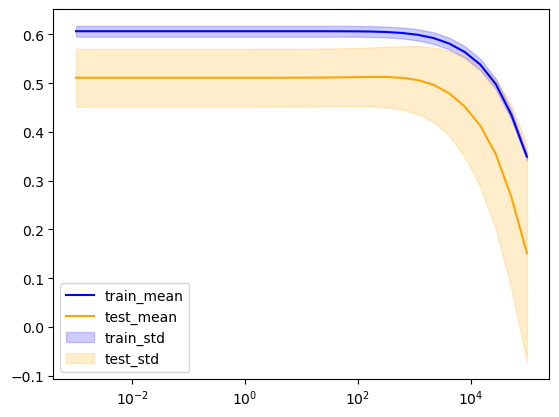

In [38]:
from sklearn.model_selection import validation_curve

model = Ridge()
alpha_values = np.logspace(-3, 5, num=30)

(train_scores, test_scores) = validation_curve(
    model, X, y, param_name="alpha", param_range=alpha_values, scoring="r2", cv=10)
validationCurveDisplay2(train_scores, test_scores, alpha_values, "log")

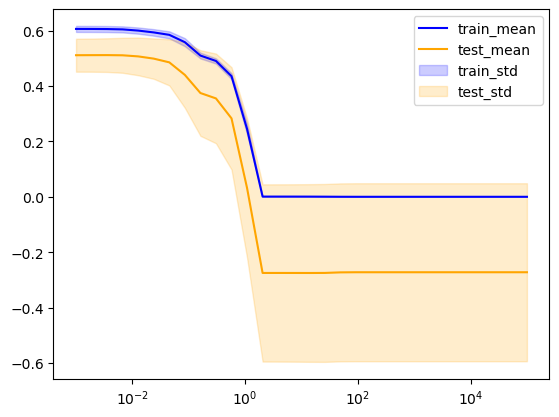

In [39]:
model = Lasso()
alpha_values = np.logspace(-3, 5, num=30)

(train_scores, test_scores) = validation_curve(
    model, X, y, param_name="alpha", param_range=alpha_values, scoring="r2", cv=10)
validationCurveDisplay2(train_scores, test_scores, alpha_values, "log")

## Exercice 4: Régression Polynomiale

Dans cet exercice, nous allons explorer la régression polynomiale et visualiser le compromis biais-variance. La régression polynomiale est une extension de la régression linéaire qui permet de modéliser des relations non linéaires entre les variables indépendantes et la variable dépendante en ajoutant des termes polynomiaux aux caractéristiques.

### Étapes:
1. Générer un jeu de données non linéaire: nous allons utiliser la fonction `make_regression` de la bibliothèque `sklearn.datasets` et introduire une non-linéarité dans la variable cible. Utiliser les polynomes non-triviaux.
2. Transformer les caractéristiques: nous allons utiliser la classe `PolynomialFeatures` de `sklearn.preprocessing` pour ajouter des termes polynomiaux aux caractéristiques.
3. Entraîner un modèle de régression polynomiale: nous allons ajuster un modèle de régression linéaire sur les caractéristiques transformées.
4. Faire des prédictions: nous allons utiliser le modèle entraîné pour faire des prédictions sur les données.
5. Visualiser les résultats: nous allons tracer les points de données réels et les prédictions du modèle pour visualiser la performance de la régression polynomiale.

### Instructions:
- Utilisez la bibliothèque `numpy` pour les calculs mathématiques.
- Utilisez `matplotlib` pour tracer les résultats.
- Expérimentez avec différents degrés de polynômes pour observer leur impact sur la performance du modèle

R2 Score: 0.729
Mean Squared Error: 9.63e+06


<AxesSubplot: >

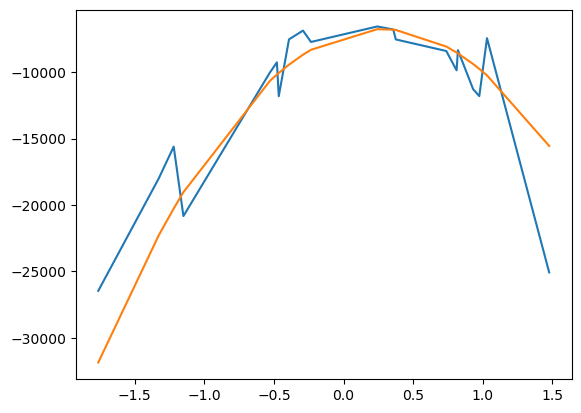

In [40]:
###########################
# Exercise 4: Polynomial Regression and Bias-Variance Visualization
###########################

from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generer les données, par exemple
X_poly, y_poly = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
y_poly = -3.1*y_poly**2 + 120*y_poly -47*y_poly-7e3  # Il est fortement recommandé d'uitliser une modification plus complexe
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3g}')

# Faites le plot
#sns.lineplot(x=X_train[:, 0], y=y_train)
sns.lineplot(x=X_test[:, 0], y=y_test)
sns.lineplot(x=X_test[:, 0], y=y_test_pred)

## Exercice 5: Régression Logistique avec des données synthétiques

Dans cet exercice, nous allons explorer la régression logistique en utilisant des données synthétiques. La régression logistique est une méthode de classification qui permet de prédire la probabilité qu'une observation appartienne à une classe donnée.

### Étapes:
1. Générer un jeu de données synthétiques: nous allons utiliser la fonction `make_classification` de la bibliothèque `sklearn.datasets` pour créer un jeu de données avec deux caractéristiques et deux classes.
2. Diviser les données en ensembles d'entraînement et de test.
3. Entraîner un modèle de régression logistique sur les données d'entraînement.
4. Faire des prédictions sur les données de test.
5. Visualiser la frontière de décision du modèle en utilisant une fonction de traçage.
6. Évaluer les performances du modèle en utilisant des métriques telles que la précision, le rappel et le score F1.

### Instructions:
- Utilisez la bibliothèque `numpy` pour les calculs mathématiques.
- Utilisez `matplotlib` pour tracer les résultats.
- Utilisez `sklearn.linear_model.LogisticRegression` pour entraîner le modèle de régression logistique.
- Utilisez `sklearn.metrics` pour évaluer les performances du modèle.

R2 Score: 0.198
Mean Squared Error: 0.2
precision: 0.783
recall: 0.857
f1 score: 0.818



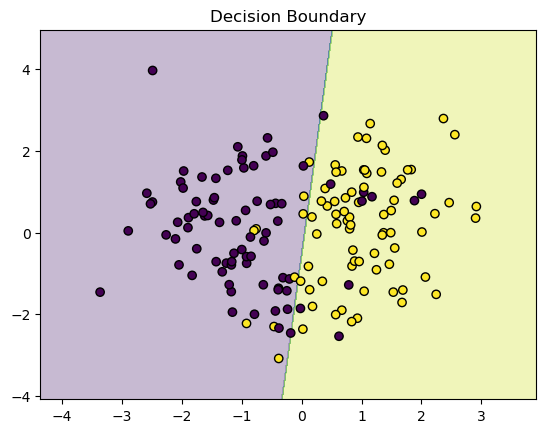

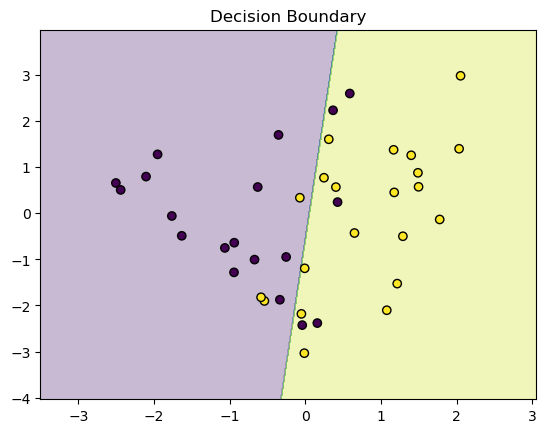

In [41]:

###########################
# Exercise 5: Régression Logistique avec des données synthétiques
###########################

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score, precision_score, recall_score

X_class, y_class = make_classification(n_samples=200, n_features=2, n_redundant=0, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_test_pred):.3g}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3g}')
print(f'precision: {precision_score(y_test, y_test_pred):.3g}')
print(f'recall: {recall_score(y_test, y_test_pred):.3g}')
print(f'f1 score: {f1_score(y_test, y_test_pred):.3g}')
print()

# la fonction pour plotter la frontière de décision
def plot_decision_boundary(model, X, y, res=100):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, res), np.linspace(y_min, y_max, res))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X_train, y_train, res=500)
plot_decision_boundary(model, X_test, y_test, res=500)



## Exercice 6: Analyse de la Matrice de Confusion et Courbe ROC

Dans cet exercice, nous allons explorer deux outils importants pour évaluer les performances des modèles de classification : la matrice de confusion et la courbe ROC (Receiver Operating Characteristic).

### Matrice de Confusion

La matrice de confusion est un tableau qui permet de visualiser les performances d'un algorithme de classification. Elle compare les valeurs prédites par le modèle avec les valeurs réelles et permet de calculer plusieurs métriques d'évaluation telles que la précision, le rappel et le score F1.

#### Exemple de Matrice de Confusion

|               | Prédit Positif | Prédit Négatif |
|---------------|----------------|----------------|
| Réel Positif  | Vrai Positif (TP)  | Faux Négatif (FN)  |
| Réel Négatif  | Faux Positif (FP)  | Vrai Négatif (TN)  |

- **Vrai Positif (TP)** : Nombre de prédictions positives correctes.
- **Faux Négatif (FN)** : Nombre de prédictions négatives incorrectes.
- **Faux Positif (FP)** : Nombre de prédictions positives incorrectes.
- **Vrai Négatif (TN)** : Nombre de prédictions négatives correctes.

### Courbe ROC et AUC

La courbe ROC est un graphique qui montre la performance d'un modèle de classification à différents seuils de discrimination. Elle trace le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité).

#### AUC (Area Under the Curve)

L'AUC est une mesure de la capacité du modèle à distinguer entre les classes. Une AUC de 1 indique un modèle parfait, tandis qu'une AUC de 0.5 indique un modèle qui ne fait pas mieux que le hasard.

### Étapes de l'exercice

1. Calculer la matrice de confusion pour les prédictions du modèle.
2. Tracer la courbe ROC pour les prédictions du modèle.
3. Calculer l'AUC pour évaluer la performance globale du modèle.

### Instructions

- Utilisez la bibliothèque `sklearn.metrics` pour calculer la matrice de confusion et tracer la courbe ROC.
- Utilisez `matplotlib` pour visualiser les résultats.

[[14  5]
 [ 3 18]]
[1.97645783 0.97645783 0.78252313 0.6583186  0.64557603 0.6436573
 0.60623901 0.56522862 0.55411568 0.55331406 0.42159506 0.39137935
 0.27963633 0.00509772]
auc score: 0.894736842105263


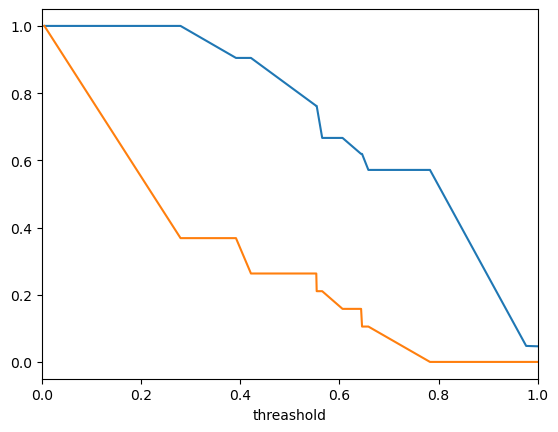

In [42]:
###########################
# Exercise 6
###########################

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_test_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))


y_test_pred_proba = model.predict_proba(X_test)[:, 1] # shown by sklearn examples
falsePosRate, truePosRate, threasholds = roc_curve(y_test, y_test_pred_proba)
print(threasholds)

plt.plot(threasholds, truePosRate, label="true positive rate")
plt.plot(threasholds, falsePosRate, label="false positive rate")
plt.xlabel("threashold");
plt.xlim(0, 1)

auc_score = roc_auc_score(y_test, y_test_pred_proba)
print(f"auc score: {auc_score}")

## Exercice 7: Cross-validation

Dans cet exercice, nous allons explorer la technique de cross-validation pour évaluer les performances des modèles de régression linéaire. La cross-validation est une méthode statistique utilisée pour estimer la performance d'un modèle de machine learning sur un ensemble de données indépendant. Elle permet de réduire le risque de surapprentissage (overfitting) et de fournir une évaluation plus fiable de la performance du modèle.

### Concepts clés

1. **Division des Données**: Les données sont divisées en plusieurs sous-ensembles appelés "folds". Typiquement, on utilise une validation croisée en k-folds, où les données sont divisées en k sous-ensembles de taille égale.

2. **Entraînement et Test**: Le modèle est entraîné k fois, chaque fois en utilisant k-1 folds pour l'entraînement et le fold restant pour le test. Ainsi, chaque fold est utilisé une fois comme ensemble de test.

3. **Évaluation**: Les performances du modèle sont évaluées pour chaque fold, et les résultats sont ensuite moyennés pour obtenir une estimation globale de la performance du modèle.

### Étapes de l'Exercice

1. Charger un jeu de données réel.
2. Définir une stratégie de cross-validation (par exemple, k-folds avec k=5).
3. Initialiser plusieurs modèles de régression linéaire (par exemple, régression linéaire simple, régression Ridge, régression Lasso).
4. Effectuer la cross-validation pour chaque modèle.
5. Calculer et afficher les scores moyens des performances des modèles.

### Instructions

- Utilisez la bibliothèque `sklearn.model_selection` pour définir la cross-validation.
- Utilisez `sklearn.linear_model` pour initialiser les modèles de régression linéaire.
- Utilisez `numpy` pour les calculs mathématiques.

In [43]:
###########################
# Exercise 7: Cross-Validation
###########################

from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso

data: Bunch = load_diabetes()
print(data["feature_names"])
X: np.ndarray = data["data"]
y: np.ndarray = data["target"]
print(X.shape, y.shape)

crossValStrat = KFold(n_splits=5)
model_simple = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()

cv_score_simple = cross_val_score(model_simple, X, y, cv=crossValStrat)
cv_score_ridge = cross_val_score(model_ridge, X, y, cv=crossValStrat)
cv_score_lasso = cross_val_score(model_lasso, X, y, cv=crossValStrat)

print(f"simple -> avg sv score: {cv_score_simple.mean():.3g}")
print(f"ridge -> avg sv score: {cv_score_ridge.mean():.3g}")
print(f"lasso -> avg sv score: {cv_score_lasso.mean():.3g}")

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10) (442,)
simple -> avg sv score: 0.482
ridge -> avg sv score: 0.41
lasso -> avg sv score: 0.338


In [44]:
## Exercice Bonus: Implémentation de la Descente de Gradient pour régression linéaire simple

Dans cet exercice bonus, vous allez implémenter un algorithme de descente de gradient pour entrainer un modèle de régression linéaire simple. La descente de gradient est une méthode d\'optimisation itérative utilisée pour minimiser une fonction de coût, dans ce cas, l\'erreur quadratique moyenne (MSE) entre les prédictions du modèle et les valeurs réelles.

### Étapes:
1. Générer un jeu de données synthétiques avec une seule caractéristique.
2. Initialiser les paramètres du modèle (poids et biais) à des valeurs aléatoires.
3. Définir la fonction de coût (MSE) et sa dérivée par rapport aux paramètres.
4. Implémenter l\'algorithme de descente de gradient pour mettre à jour les paramètres du modèle.
5. Entraîner le modèle en utilisant la descente de gradient sur les données d\'entraînement.
6. Visualiser la ligne de régression trouvé par le modèle et les points de données.
7. Évaluer les performances du modèle en utilisant des métriques telles que le coefficient de détermination (R²) et l\'erreur quadratique moyenne (MSE).

### Instructions:
- Utilisez la bibliothèque `numpy` pour les calculs mathématiques.
- Tracez les résultats en utilisant `matplotlib`.
- Expérimentez avec différents taux d\'apprentissage et nombres d\'itérations pour observer leur impact sur la convergence de l\'algorithme.

SyntaxError: invalid syntax (1696110751.py, line 3)